In [282]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# for data scaling and splitting
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
# for neural net
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# for evaluation
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [283]:
data = pd.read_csv("data/combined_expression.csv")
data['classification'].map({1: 0, 2: 1})
data.head()
data.shape

(642, 16383)

In [284]:
selected_genes = pd.read_csv('cleaned/boruta-99-25-0.01.csv')
selected_genes = selected_genes.values.tolist()
selected_genes = list(itertools.chain(*selected_genes))

In [738]:
# retrieving proper columns
X = data.loc[:, selected_genes]
y = data['classification'].values

# scaling the data
scalar = MinMaxScaler()
x_scaled = scalar.fit_transform(X)

# splitting data (20% test, 80% train)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

# 4 Hidden Layers (with batch normalization)

In [767]:
from tensorflow.keras.layers import BatchNormalization

def create_model(optimizer='rmsprop',init='glorot_uniform', dropout=0.3):
    model = Sequential()
    # adding layers and adding droplayers to avoid overfitting
    hidden_layers = len(selected_genes)
    model.add(Dense(hidden_layers, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))

    model.add(Dense((hidden_layers*1.5), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense((hidden_layers), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense((hidden_layers*0.25), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    # compiling
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [773]:
# parameters selected from previous gridsearch
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, optimizer='Adam',init='normal')
# kfold = KFold(n_splits=3, shuffle=True)
# results = cross_val_score(model, X_train, y_train, cv=kfold)
# print("Baseline Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [774]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test))
y_pred = model.predict(X_test)

Train on 513 samples, validate on 129 samples
Epoch 1/50
513/513 [==============================] - 3s 6ms/sample - loss: 0.9322 - accuracy: 0.5458 - val_loss: 1.0558 - val_accuracy: 0.0000e+00
Epoch 2/50
513/513 [==============================] - 0s 646us/sample - loss: 0.7391 - accuracy: 0.6647 - val_loss: 1.1220 - val_accuracy: 0.0000e+00
Epoch 3/50
513/513 [==============================] - 0s 644us/sample - loss: 0.6796 - accuracy: 0.6686 - val_loss: 1.0936 - val_accuracy: 0.0000e+00
Epoch 4/50
513/513 [==============================] - 0s 643us/sample - loss: 0.5798 - accuracy: 0.7154 - val_loss: 1.3205 - val_accuracy: 0.0000e+00
Epoch 5/50
513/513 [==============================] - 0s 676us/sample - loss: 0.5131 - accuracy: 0.7836 - val_loss: 1.4281 - val_accuracy: 0.0000e+00
Epoch 6/50
513/513 [==============================] - 0s 652us/sample - loss: 0.5527 - accuracy: 0.7407 - val_loss: 1.6394 - val_accuracy: 0.0000e+00
Epoch 7/50
513/513 [==============================] - 0s

In [775]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        82
           2       0.70      0.70      0.70        47

    accuracy                           0.78       129
   macro avg       0.77      0.77      0.77       129
weighted avg       0.78      0.78      0.78       129



In [776]:
print(confusion_matrix(y_test, y_pred))

[[68 14]
 [14 33]]


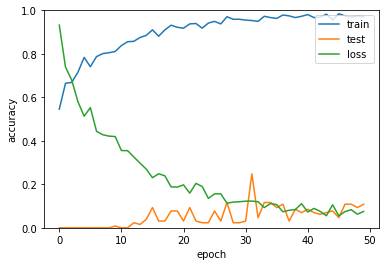

In [777]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'loss'], loc='upper right')
plt.ylim(0, 1)
plt.show()

# 3 Hidden Layers

In [796]:
def create_model2(optimizer='rmsprop',init='glorot_uniform', dropout=0.3):
    model = Sequential()
    # adding layers and adding droplayers to avoid overfitting
    hidden_layers = len(selected_genes)
    model.add(BatchNormalization())
    model.add(Dense(hidden_layers, activation='relu'))
    model.add(Dropout(dropout))
    
    model.add(BatchNormalization())
    model.add(Dense((hidden_layers*1.75), activation='relu'))
    model.add(Dropout(dropout))

    model.add(BatchNormalization())
    model.add(Dense((hidden_layers*0.25), activation='relu'))
    model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    # compiling
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [797]:
# parameters selected from previous gridsearch
model = KerasClassifier(build_fn=create_model2, epochs=50, batch_size=32, optimizer='Adam', init='normal')
# kfold = KFold(n_splits=3, shuffle=True)
# results = cross_val_score(model, X_train, y_train, cv=kfold)
# print("Baseline Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [798]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=True)
y_pred = model.predict(X_test)

Train on 513 samples, validate on 129 samples
Epoch 1/50
513/513 [==============================] - 3s 5ms/sample - loss: 0.8081 - accuracy: 0.5673 - val_loss: 1.0474 - val_accuracy: 0.0000e+00
Epoch 2/50
513/513 [==============================] - 0s 639us/sample - loss: 0.5930 - accuracy: 0.7173 - val_loss: 1.5087 - val_accuracy: 0.0000e+00
Epoch 3/50
513/513 [==============================] - 0s 549us/sample - loss: 0.4865 - accuracy: 0.7622 - val_loss: 1.4476 - val_accuracy: 0.0000e+00
Epoch 4/50
513/513 [==============================] - 0s 560us/sample - loss: 0.4738 - accuracy: 0.7719 - val_loss: 1.6567 - val_accuracy: 0.0000e+00
Epoch 5/50
513/513 [==============================] - 0s 602us/sample - loss: 0.3777 - accuracy: 0.8207 - val_loss: 1.6513 - val_accuracy: 0.0000e+00
Epoch 6/50
513/513 [==============================] - 0s 546us/sample - loss: 0.3221 - accuracy: 0.8499 - val_loss: 1.7757 - val_accuracy: 0.0000e+00
Epoch 7/50
513/513 [==============================] - 0s

In [799]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.87      0.85        82
           2       0.74      0.68      0.71        47

    accuracy                           0.80       129
   macro avg       0.78      0.77      0.78       129
weighted avg       0.80      0.80      0.80       129



In [800]:
print(confusion_matrix(y_test, y_pred))

[[71 11]
 [15 32]]


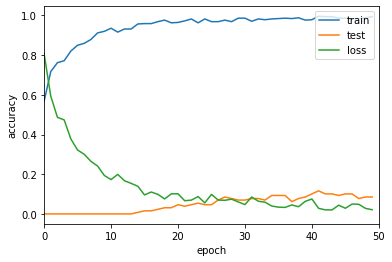

In [801]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'loss'], loc='upper right')
plt.xlim(0, 50)
plt.show()

# 2 Hidden Layers

In [860]:
def create_model(optimizer='rmsprop',init='glorot_uniform', dropout=0.3):
    model = Sequential()
    # adding layers and adding droplayers to avoid overfitting
    hidden_layers = len(selected_genes)
    model.add(Dense(hidden_layers*1.5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense((hidden_layers), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    # compiling
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [861]:
# parameters selected from previous gridsearch
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, optimizer='Adam',init='uniform')
# kfold = KFold(n_splits=3, shuffle=True)
# results = cross_val_score(model, X_train, y_train, cv=kfold)
# print("Baseline Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [862]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=True)
y_pred = model.predict(X_test)

Train on 513 samples, validate on 129 samples
Epoch 1/50
513/513 [==============================] - 2s 4ms/sample - loss: 0.8510 - accuracy: 0.6004 - val_loss: 0.6535 - val_accuracy: 0.2558
Epoch 2/50
513/513 [==============================] - 0s 586us/sample - loss: 0.6036 - accuracy: 0.7115 - val_loss: 1.1957 - val_accuracy: 0.0000e+00
Epoch 3/50
513/513 [==============================] - 0s 583us/sample - loss: 0.4708 - accuracy: 0.7856 - val_loss: 1.4727 - val_accuracy: 0.0000e+00
Epoch 4/50
513/513 [==============================] - 0s 487us/sample - loss: 0.4216 - accuracy: 0.7992 - val_loss: 1.5635 - val_accuracy: 0.0000e+00
Epoch 5/50
513/513 [==============================] - 0s 508us/sample - loss: 0.3806 - accuracy: 0.8187 - val_loss: 1.8596 - val_accuracy: 0.0000e+00
Epoch 6/50
513/513 [==============================] - 0s 521us/sample - loss: 0.3015 - accuracy: 0.8811 - val_loss: 2.3799 - val_accuracy: 0.0000e+00
Epoch 7/50
513/513 [==============================] - 0s 481

In [863]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.94      0.86        82
           2       0.84      0.57      0.68        47

    accuracy                           0.81       129
   macro avg       0.82      0.76      0.77       129
weighted avg       0.81      0.81      0.80       129



In [864]:
print(confusion_matrix(y_test, y_pred))

[[77  5]
 [20 27]]


In [865]:
model.model.save('models/hidden_2.h5')

# 1 Hidden Layer

In [843]:
def create_model(optimizer='rmsprop',init='glorot_uniform', dropout=0.3):
    model = Sequential()
    # adding layers and adding droplayers to avoid overfitting
    hidden_layers = len(selected_genes)
    model.add(Dense(hidden_layers*1.5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    # compiling
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [844]:
# parameters selected from previous gridsearch
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, optimizer='Adam',init='uniform')
# kfold = KFold(n_splits=3, shuffle=True)
# results = cross_val_score(model, X_train, y_train, cv=kfold)
# print("Baseline Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [845]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=True)
y_pred = model.predict(X_test)

Train on 513 samples, validate on 129 samples
Epoch 1/50
513/513 [==============================] - 1s 3ms/sample - loss: 0.7552 - accuracy: 0.6179 - val_loss: 1.6000 - val_accuracy: 0.0000e+00
Epoch 2/50
513/513 [==============================] - 0s 465us/sample - loss: 0.5348 - accuracy: 0.7563 - val_loss: 1.6052 - val_accuracy: 0.0000e+00
Epoch 3/50
513/513 [==============================] - 0s 472us/sample - loss: 0.4958 - accuracy: 0.7641 - val_loss: 1.9520 - val_accuracy: 0.0000e+00
Epoch 4/50
513/513 [==============================] - 0s 475us/sample - loss: 0.4552 - accuracy: 0.7661 - val_loss: 2.1026 - val_accuracy: 0.0000e+00
Epoch 5/50
513/513 [==============================] - 0s 477us/sample - loss: 0.3919 - accuracy: 0.8207 - val_loss: 2.8331 - val_accuracy: 0.0000e+00
Epoch 6/50
513/513 [==============================] - 0s 474us/sample - loss: 0.3805 - accuracy: 0.8265 - val_loss: 2.3526 - val_accuracy: 0.0000e+00
Epoch 7/50
513/513 [==============================] - 0s

In [846]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.89      0.85        82
           2       0.77      0.64      0.70        47

    accuracy                           0.80       129
   macro avg       0.79      0.76      0.77       129
weighted avg       0.80      0.80      0.79       129



In [847]:
print(confusion_matrix(y_test, y_pred))

[[73  9]
 [17 30]]


In [828]:
model.model.save('models/hidden_1.h5')